In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# creating data
mean = np.array([5.0, 6.0])
cov = np.array([[1.0, 0.95], [0.95, 1.2]])
data = np.random.multivariate_normal(mean, cov, 8000)


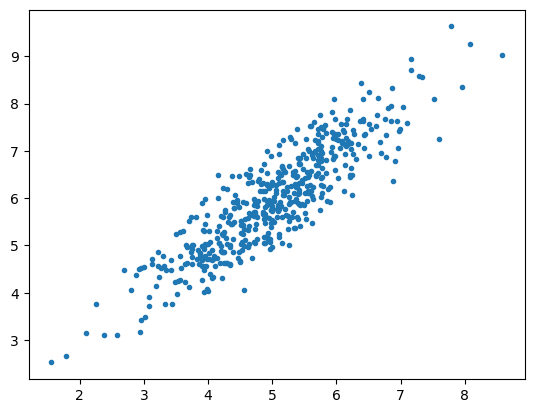

In [3]:
# Visualizing data
plt.scatter(data[:500,0], data[:500, 1], marker = '.')
plt.show()

In [8]:
# Train Test Split
data = np.hstack((np.ones((data.shape[0], 1)), data))

split_factor = 0.90
split = int(split_factor * data.shape[0])

X_train = data[:split, :-1]
y_train = data[:split, -1].reshape((-1,1))
X_test = data[split:, -1]
y_test = data[split:, -1].reshape((-1,1))

#print(& quot Number of exapmles in training set = % d & quot % (X_train.shape[0]))
#print(& quot Number of examples in testing set = % d & quot % (X_test.shape[0]))

In [13]:
# Linear Regression using Mini batch gradient descent
# function to compute hypothesis and predictions

def hypothesis(X, theta):
    return np.dot(X, theta)

# function to compute gradient of error function w.r.t theta

def gradient(X, y, theta):
    h = hypothesis(X, theta)
    grad = np.dot(X.transpose(), (h-y))
    return grad

# function to compute the error of current values of theta

def cost(X, y, theta):
    h = hypothesis(X, theta)
    J = np.dot((h-y).transpose(), (h-y))
    J /= 2
    return J[0]

def create_mini_batches(X,y, batch_size):
    mini_batches = []
    data = np.hstack((X,y))
    np.random.shuffle(data)
    n_minibatches = data.shape[0] // batch_size
    i = 0
    
    for i in range(n_minibatches + 1):
        mini_batch = data[i * batch_size: (i+1)* batch_size, :]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape(-1,1)
        mini_batches.append((X_mini, Y_mini))
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        X_mini = mini_batch[:, :-1]
        Y_mini = mini_batch[:, -1].reshape((-1,1))
        mini_batches.append((X_mini, Y_mini))
    return mini_batches

def gradientDescent(X, y, learning_rate = 0.001, batch_size = 32):
    
    theta = np.zeros((X.shape[1],1))
    error_list = []
    max_iters = 3
    
    for itr in range(max_iters):
        mini_batches = create_mini_batches(X, y, batch_size)
        
        for mini_batch in mini_batches:
            X_mini, y_mini = mini_batch
            theta = theta - learning_rate * gradient(X_mini, y_mini, theta)
            error_list.append(cost(X_mini, y_mini, theta))
    return theta, error_list

Bias =  [0.53368827]
Coefficients =  [[0.53368827]
 [0.97537917]]


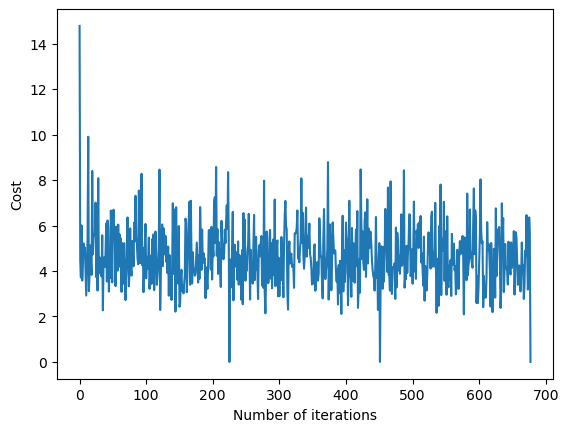

In [14]:
theta, error_list = gradientDescent(X_train, y_train)
print("Bias = ", theta[0])
print("Coefficients = ", theta[1:])

#Visualizing gradient descent
plt.plot(error_list)
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.show()

In [16]:
# Predicting output for X_test
y_pred = hypothesis(X_test, theta)
plt.scatter(X_test[:, 1], y_test[:, ], marker = '.')
plt.plot(X_test[:, 1], y_pred, color = 'orange')
plt.show()

ValueError: shapes (800,) and (3,1) not aligned: 800 (dim 0) != 3 (dim 0)

In [ ]:
# Calculating error in predictions
error = np.sum(np.abs(y_test-y_pred) / y_test.shape[0])